# Classification of Auto Insurance Claim

**Aim of this study**: 
Given the auto-insurance claim data (containing many features) of several customers with their respective target labels, The goal is to train and test with different machine learning algorithms for the given data to predict if the claim is valid or not.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Exploration</a></span><ul class="toc-item"><li><span><a href="#Initial-Impressions-of-Data" data-toc-modified-id="Initial-Impressions-of-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Initial Impressions of Data</a></span></li><li><span><a href="#Exploration-of-Missing-Data-Values" data-toc-modified-id="Exploration-of-Missing-Data-Values-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Exploration of Missing Data Values</a></span><ul class="toc-item"><li><span><a href="#Remarks-on-original-train-dataset" data-toc-modified-id="Remarks-on-original-train-dataset-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Remarks on original train-dataset</a></span></li><li><span><a href="#Remarks-on-original-test-dataset" data-toc-modified-id="Remarks-on-original-test-dataset-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Remarks on original test-dataset</a></span></li></ul></li><li><span><a href="#Visualization-of-feature-vectors" data-toc-modified-id="Visualization-of-feature-vectors-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Visualization of feature vectors</a></span></li></ul></li><li><span><a href="#Data-Cleaning-and-EDA" data-toc-modified-id="Data-Cleaning-and-EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Cleaning and EDA</a></span><ul class="toc-item"><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data Cleaning</a></span></li><li><span><a href="#Feature-Scaling" data-toc-modified-id="Feature-Scaling-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Feature Scaling</a></span></li><li><span><a href="#EDA-(Explorative-Data-Analysis)" data-toc-modified-id="EDA-(Explorative-Data-Analysis)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>EDA (Explorative Data Analysis)</a></span></li></ul></li><li><span><a href="#ML-Models-and-Results" data-toc-modified-id="ML-Models-and-Results-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>ML-Models and Results</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Decision-Tree-Classifier" data-toc-modified-id="Decision-Tree-Classifier-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Decision Tree Classifier</a></span></li><li><span><a href="#Support-Vector-Classifier" data-toc-modified-id="Support-Vector-Classifier-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Support Vector Classifier</a></span></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Random Forest Classifier</a></span></li><li><span><a href="#KNearest-Neighbour-Classifier" data-toc-modified-id="KNearest-Neighbour-Classifier-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>KNearest Neighbour Classifier</a></span></li></ul></li><li><span><a href="#Final-Remarks" data-toc-modified-id="Final-Remarks-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Final Remarks</a></span></li><li><span><a href="#Future-Improvements" data-toc-modified-id="Future-Improvements-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Future Improvements</a></span></li></ul></div>

In [1]:
# import all the necessary libaries

# data processing libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import time
from sklearn.model_selection import train_test_split

# plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot
from termcolor import cprint

# User defined imports --> stored in Code folder of the repo
from Code.print_info import PrintInfo  # It is a class of useful functions to explore the data
from Code.preprocess import CleanData  # It is a class of useful functions to preprocess and clean the data
from Code.eda import EDA
from Code.models import ModelsforAutoInsurance

import warnings
warnings.filterwarnings('ignore')

## Data Exploration

### Initial Impressions of Data

Firstly, we will take a sneak peek into the data to get the initial impressions of the data

In [2]:
# loading the original train and test datasets using pandas 
train_data_original = pd.read_csv('./Data/train_auto.csv', sep = ',')
test_data_original = pd.read_csv('./Data/test_auto.csv', sep = ',')

# Instanciating PrintInfo class with train and test datasets
print_info_train_data = PrintInfo(train_data_original)
print_info_test_data = PrintInfo(test_data_original)

In [3]:
#sneak peek into train data
print_info_train_data.sneak_peek()

First sneak peak into the train data
------------------------------------------------------
1. Number of records in the data are 8161
2. Number of feature vectors in the data are 26
3. The first 5 records of the data


,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,z_No,M,PhD,Professional,14,Private,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,22,Commercial,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,5,Private,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
3,5,0,0.0,0,51.0,0,14.0,NaN,No,"$306,251",Yes,M,<High School,z_Blue Collar,32,Private,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0.0,0,50.0,0,NaN,"$114,986",No,"$243,925",Yes,z_F,PhD,Doctor,36,Private,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban


In [4]:
# unique elements of the categorical features vectors in the original train data
print_info_train_data.print_all_unique_elements()

unique elements in categorical feature of the train data:
-----------------------------------------------------------------------------


,Categorical features,Unique elements
0,PARENT1,"[No, Yes]"
1,MSTATUS,"[z_No, Yes]"
2,SEX,"[M, z_F]"
3,EDUCATION,"[PhD, z_High School, <High School, Bachelors, ..."
4,JOB,"[Professional, z_Blue Collar, Clerical, Doctor..."
5,CAR_USE,"[Private, Commercial]"
6,CAR_TYPE,"[Minivan, z_SUV, Sports Car, Van, Panel Truck,..."
7,RED_CAR,"[yes, no]"
8,REVOKED,"[No, Yes]"
9,URBANICITY,"[Highly Urban/ Urban, z_Highly Rural/ Rural]"


In [5]:
#sneak peek into test data
print_info_test_data.sneak_peek()

First sneak peak into the train data
------------------------------------------------------
1. Number of records in the data are 2141
2. Number of feature vectors in the data are 26
3. The first 5 records of the data


,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,3,NaN,NaN,0,48.0,0,11.0,"$52,881",No,$0,z_No,M,Bachelors,Manager,26,Private,"$21,970",1,Van,yes,$0,0,No,2,10.0,Highly Urban/ Urban
1,9,NaN,NaN,1,40.0,1,11.0,"$50,815",Yes,$0,z_No,M,z_High School,Manager,21,Private,"$18,930",6,Minivan,no,"$3,295",1,No,2,1.0,Highly Urban/ Urban
2,10,NaN,NaN,0,44.0,2,12.0,"$43,486",Yes,$0,z_No,z_F,z_High School,z_Blue Collar,30,Commercial,"$5,900",10,z_SUV,no,$0,0,No,0,10.0,z_Highly Rural/ Rural
3,18,NaN,NaN,0,35.0,2,NaN,"$21,204",Yes,$0,z_No,M,z_High School,Clerical,74,Private,"$9,230",6,Pickup,no,$0,0,Yes,0,4.0,z_Highly Rural/ Rural
4,21,NaN,NaN,0,59.0,0,12.0,"$87,460",No,$0,z_No,M,z_High School,Manager,45,Private,"$15,420",1,Minivan,yes,"$44,857",2,No,4,1.0,Highly Urban/ Urban


In [6]:
# unique elements of the categorical features vectors in the original test data
print_info_test_data.print_all_unique_elements(train = False)

unique elements in categorical feature of the test data:
-----------------------------------------------------------------------------


,Categorical features,Unique elements
0,PARENT1,"[No, Yes]"
1,MSTATUS,"[z_No, Yes]"
2,SEX,"[M, z_F]"
3,EDUCATION,"[Bachelors, z_High School, <High School, PhD, ..."
4,JOB,"[Manager, z_Blue Collar, Clerical, Professiona..."
5,CAR_USE,"[Private, Commercial]"
6,CAR_TYPE,"[Van, Minivan, z_SUV, Pickup, Panel Truck, Spo..."
7,RED_CAR,"[yes, no]"
8,REVOKED,"[No, Yes]"
9,URBANICITY,"[Highly Urban/ Urban, z_Highly Rural/ Rural]"


### Exploration of Missing Data Values

Since we have already found a few issues with the data, like missing values, we can further explore and try to understand them in detail.

* For both train and test data following is calculated for features with NaN (missing values) values
    * Number of NaNs - count of NaN elements in features (if count is zero then the feature is ignored in the below table)
    * NaN elements (%) - percentage of NaN elements 


In [7]:
# missing values in original training data
print_info_train_data.no_entry_values_in_features()

Number of NaN values in features of the train data
-----------------------------------------------------


,Features with NaN,Num of NaNs,NaN elements (%)
0,AGE,6,0.073520
1,YOJ,454,5.563044
2,INCOME,445,5.452763
3,HOME_VAL,464,5.685578
4,JOB,526,6.445289
5,CAR_AGE,510,6.249234


In [8]:
# missing values in original testing data
print_info_test_data.no_entry_values_in_features(train = False)

Number of NaN values in features of the test data
-----------------------------------------------------


,Features with NaN,Num of NaNs,NaN elements (%)
0,TARGET_FLAG,2141,100.000000
1,TARGET_AMT,2141,100.000000
2,AGE,1,0.046707
3,YOJ,94,4.390472
4,INCOME,125,5.838393
5,HOME_VAL,111,5.184493
6,JOB,139,6.492293
7,CAR_AGE,129,6.025222


#### Remarks on original train-dataset
1. Auto-Insurance records of 8161 customers are present.
2. A total of 23 feature vectors are available for each customer record.
3. TARGET_FLAG and TARGET_AMT keys in the data represent target labels. However, since we are interested in only classification problem, TARGET_FLAG is considered for this study.
4. Class: This feature is the TARGET_FLAG and it takes value 0 in case of valid claim and 1 otherwise.
4. As seen above in the first few rows, it is evident that data contains numerical and categorical features (unique entries in these features are shown in the above table).
5. In the EDUCATION feature vector, there is a possible data entry error of z_High School, i.e., some entries of EDUCATION contain <High School (instead of z_High School). Hence this column should be consistently labelled.
6. Also, some missing values can be seen in the data.
7. Features like INCOME, HOME_VAL, BLUEBOOK, and OLD_CLAIM use dollar symbols, making them categorical features that they are not.

#### Remarks on original test-dataset
1. Auto-Insurance records of 2141 customers are present.
2. The values for TARGET_FLAG and TARGET_AMT keys are not available

### Visualization of feature vectors

 Numerical Features 
 Categorical Features 


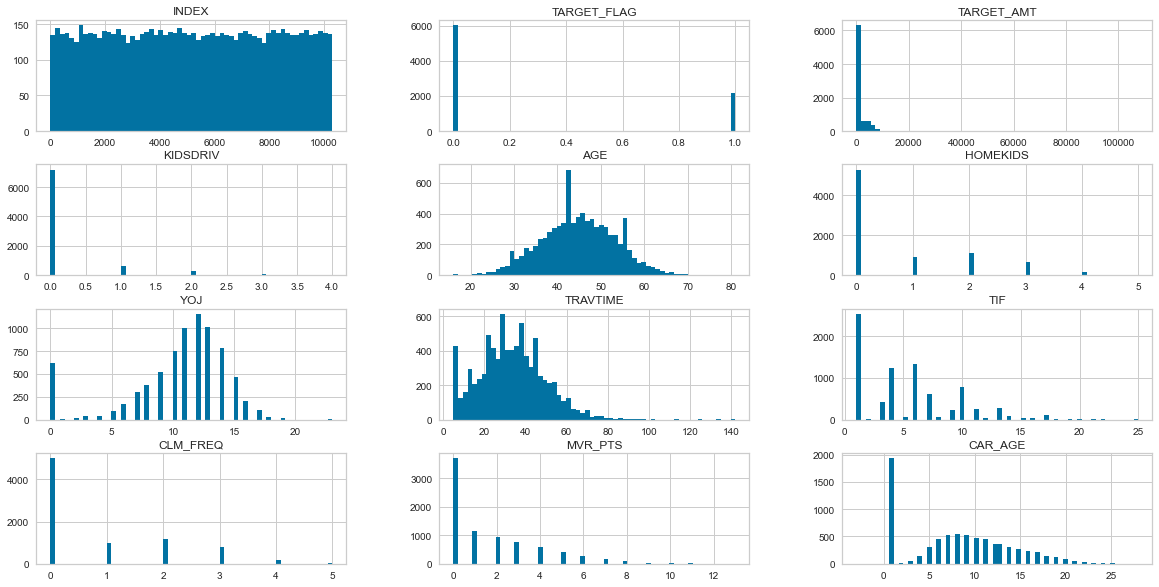

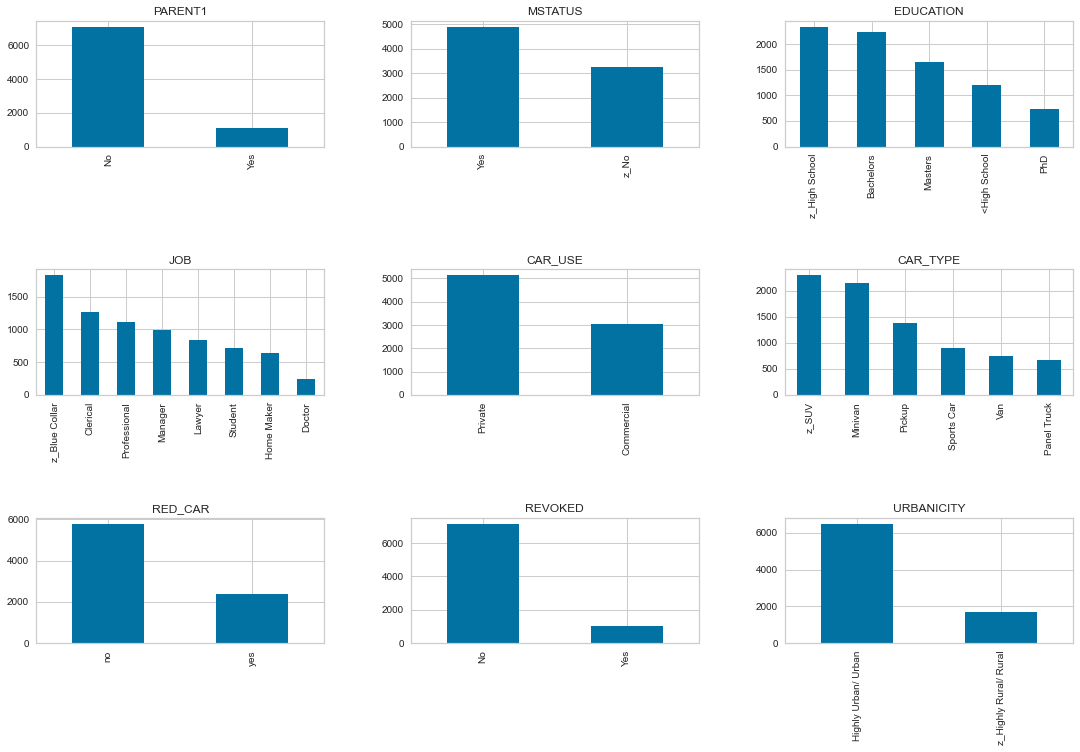

In [9]:
print_info_train_data.visualize_feature_plots()

## Data Cleaning and EDA

### Data Cleaning

As we saw in the previous section, the original data contains issues of 
* Inconsistent labelling in categorical features
* Dollar symbols in the features which represent currencies as values
* Missing values
* Categorical features with different labels: most have two labels, and some are more than two. 

Before proceeding with any machine learning algorithm, it's essential to clean the original train and test data for the above issues.

**Step1: correcting misspelt values**\
**Step2: casting string dollar amounts columns to numerical**\
**Step3: Strategy for dealing with missing values**
1. For numeric features in the data, the missing values are replaced with the mean of the feature.
> e.g.: AGE feature vector contains six missing values, each is replaced with mean AGE 
2. For categorical features, on the other hand, NaN values are replaced with a label of the maximum count.
> e.g., JOB feature vector contains 526 missing values, each is replaced with z_Blue Collar  

**Step4: Strategy for encoding the categorical features**
1. categorical features with two labels - onehot encoding 
> e.g., the RED_CAR feature has two labels [yes, no] 
2. categorical features more than two labels - ordinal encoding
> e.g., EDUCATION feature has four unique labels [z_High School, Masters, Bachelors, PhD]

> **Note** Below each step is executed individually to show their results. However, these steps will be executed together in a sklearn Pipeline when used on various machine learning algorithms.

In [10]:
# Step1: correcting misspelt values
train_data_original_ = train_data_original.drop(['INDEX', 'TARGET_FLAG', 'TARGET_AMT'], axis=1).copy()
clean_train_data = CleanData()
clean_train_data.perform_consistent_labelling(train_data_original_)

# output
cprint('Original Data', color = 'green')
cprint('-------------', color = 'red')
cprint(f'The unique elements in EDUCATION feature  {train_data_original.EDUCATION.unique()}', color ='grey')
cprint('\nAfter correcting the misspelt values', color = 'green')
cprint('--------------------------------------', color = 'red')
cprint(f'The unique elements in EDUCATION feature  {train_data_original.EDUCATION.unique()}', color = 'grey')


Original Data
-------------
The unique elements in EDUCATION feature  ['PhD' 'z_High School' '<High School' 'Bachelors' 'Masters']

After correcting the misspelt values
--------------------------------------
The unique elements in EDUCATION feature  ['PhD' 'z_High School' '<High School' 'Bachelors' 'Masters']


In [11]:
# Step2: casting string dollar amounts columns to numerical
clean_train_data.dollar_to_numeric(train_data_original_)

# output
cprint('Original Data', color = 'green')
cprint('-------------', color = 'red')
train_data_original.drop(['INDEX', 'TARGET_FLAG', 'TARGET_AMT'], axis=1).head()

Original Data
-------------


,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,0,60.0,0,11.0,"$67,349",No,$0,z_No,M,PhD,Professional,14,Private,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,22,Commercial,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,5,Private,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
3,0,51.0,0,14.0,NaN,No,"$306,251",Yes,M,<High School,z_Blue Collar,32,Private,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
4,0,50.0,0,NaN,"$114,986",No,"$243,925",Yes,z_F,PhD,Doctor,36,Private,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban


In [12]:
cprint('After casting string dollar amounts columns to numerical', color = 'green')
cprint('--------------------------------------------------------', color = 'red')
train_data_original_.head()

After casting string dollar amounts columns to numerical
--------------------------------------------------------


,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,0,60.0,0,11.0,67.348999,No,0.000000,z_No,M,PhD,Professional,14,Private,14.23,11,Minivan,yes,4.461000,2,No,3,18.0,Highly Urban/ Urban
1,0,43.0,0,11.0,91.448997,No,257.252014,z_No,M,z_High School,z_Blue Collar,22,Commercial,14.94,1,Minivan,yes,0.000000,0,No,0,1.0,Highly Urban/ Urban
2,0,35.0,1,10.0,16.039000,No,124.191002,Yes,z_F,z_High School,Clerical,5,Private,4.01,4,z_SUV,no,38.689999,2,No,3,10.0,Highly Urban/ Urban
3,0,51.0,0,14.0,NaN,No,306.251007,Yes,M,z_High School,z_Blue Collar,32,Private,15.44,7,Minivan,yes,0.000000,0,No,0,6.0,Highly Urban/ Urban
4,0,50.0,0,NaN,114.986000,No,243.925003,Yes,z_F,PhD,Doctor,36,Private,18.00,1,z_SUV,no,19.216999,2,Yes,3,17.0,Highly Urban/ Urban


In [13]:
# Step3: Strategy for dealing with missing values
clean_train_data.replace_nan_value_entries(train_data_original_)

# output
cprint('After filling all the missing values', color = 'green')
cprint('------------------------------------', color = 'red')
print(train_data_original_.isna().sum())
train_data_original_.head()

After filling all the missing values
------------------------------------
KIDSDRIV      0
AGE           0
HOMEKIDS      0
YOJ           0
INCOME        0
PARENT1       0
HOME_VAL      0
MSTATUS       0
SEX           0
EDUCATION     0
JOB           0
TRAVTIME      0
CAR_USE       0
BLUEBOOK      0
TIF           0
CAR_TYPE      0
RED_CAR       0
OLDCLAIM      0
CLM_FREQ      0
REVOKED       0
MVR_PTS       0
CAR_AGE       0
URBANICITY    0
dtype: int64


,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,0,60.0,0,11.000000,67.348999,No,0.000000,z_No,M,PhD,Professional,14,Private,14.23,11,Minivan,yes,4.461000,2,No,3,18.0,Highly Urban/ Urban
1,0,43.0,0,11.000000,91.448997,No,257.252014,z_No,M,z_High School,z_Blue Collar,22,Commercial,14.94,1,Minivan,yes,0.000000,0,No,0,1.0,Highly Urban/ Urban
2,0,35.0,1,10.000000,16.039000,No,124.191002,Yes,z_F,z_High School,Clerical,5,Private,4.01,4,z_SUV,no,38.689999,2,No,3,10.0,Highly Urban/ Urban
3,0,51.0,0,14.000000,64.757858,No,306.251007,Yes,M,z_High School,z_Blue Collar,32,Private,15.44,7,Minivan,yes,0.000000,0,No,0,6.0,Highly Urban/ Urban
4,0,50.0,0,10.499286,114.986000,No,243.925003,Yes,z_F,PhD,Doctor,36,Private,18.00,1,z_SUV,no,19.216999,2,Yes,3,17.0,Highly Urban/ Urban


In [14]:
# Step4: Strategy for encoding the categorical features
clean_train_data.encoding_for_cat_features(train_data_original_)

# output
cprint('After encoding all the categorical features', color = 'green')
cprint('-------------------------------------------', color = 'red')
train_data_original_.head()

After encoding all the categorical features
-------------------------------------------


,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,0,60.0,0,11.000000,67.348999,0,0.000000,1,0,2,5,14,1,14.23,11,0,1,4.461000,2,0,3,18.0,0
1,0,43.0,0,11.000000,91.448997,0,257.252014,1,0,3,7,22,0,14.94,1,0,1,0.000000,0,0,0,1.0,0
2,0,35.0,1,10.000000,16.039000,0,124.191002,0,1,3,0,5,1,4.01,4,5,0,38.689999,2,0,3,10.0,0
3,0,51.0,0,14.000000,64.757858,0,306.251007,0,0,3,7,32,1,15.44,7,0,1,0.000000,0,0,0,6.0,0
4,0,50.0,0,10.499286,114.986000,0,243.925003,0,1,2,1,36,1,18.00,1,5,0,19.216999,2,1,3,17.0,0


In [15]:
train_data_original_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KIDSDRIV    8161 non-null   int64  
 1   AGE         8161 non-null   float64
 2   HOMEKIDS    8161 non-null   int64  
 3   YOJ         8161 non-null   float64
 4   INCOME      8161 non-null   float32
 5   PARENT1     8161 non-null   int8   
 6   HOME_VAL    8161 non-null   float32
 7   MSTATUS     8161 non-null   int8   
 8   SEX         8161 non-null   int8   
 9   EDUCATION   8161 non-null   int8   
 10  JOB         8161 non-null   int8   
 11  TRAVTIME    8161 non-null   int64  
 12  CAR_USE     8161 non-null   int8   
 13  BLUEBOOK    8161 non-null   float32
 14  TIF         8161 non-null   int64  
 15  CAR_TYPE    8161 non-null   int8   
 16  RED_CAR     8161 non-null   int8   
 17  OLDCLAIM    8161 non-null   float32
 18  CLM_FREQ    8161 non-null   int64  
 19  REVOKED     8161 non-null  

### Feature Scaling

After the data is cleaned, all the features are scaled using MinMaxScaler()  

In [16]:
# Feature scaling
scaled_array = clean_train_data.scale_feature_values(train_data_original_)

# output
cprint('After scaling all the features', color = 'green')
cprint('------------------------------', color = 'red')
clean_and_scaled_data = pd.DataFrame(scaled_array, columns=train_data_original_.columns)
clean_and_scaled_data.head()

After scaling all the features
------------------------------


,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,0.0,0.676923,0.0,0.478261,0.067552,0.0,0.000000,1.0,0.0,0.666667,0.714286,0.065693,1.0,0.186547,0.416667,0.0,1.0,0.004465,0.4,0.0,0.230769,0.677419,0.0
1,0.0,0.415385,0.0,0.478261,0.091724,0.0,0.290588,1.0,0.0,1.000000,1.000000,0.124088,0.0,0.196952,0.000000,0.0,1.0,0.000000,0.0,0.0,0.000000,0.129032,0.0
2,0.0,0.292308,0.2,0.434783,0.016087,0.0,0.140284,0.0,1.0,1.000000,0.000000,0.000000,1.0,0.036782,0.125000,1.0,0.0,0.038729,0.4,0.0,0.230769,0.419355,0.0
3,0.0,0.538462,0.0,0.608696,0.064953,0.0,0.345936,0.0,0.0,1.000000,1.000000,0.197080,1.0,0.204279,0.250000,0.0,1.0,0.000000,0.0,0.0,0.000000,0.290323,0.0
4,0.0,0.523077,0.0,0.456491,0.115332,0.0,0.275534,0.0,1.0,0.666667,0.142857,0.226277,1.0,0.241794,0.000000,1.0,0.0,0.019236,0.4,1.0,0.230769,0.645161,0.0


### EDA (Explorative Data Analysis)

After the data is cleaned and scaled, EDA can be conducted on the data to explore in little more detail.

1. Firstly, we will calculate pairwise correlation between the feature vectors to understand the independence of feature vectors in the data
2. Secondly, we will perform principle PCA (Principle Component Analysis) to reduce the dimentionality

Heatmap of dataset
--------------------------------------------------


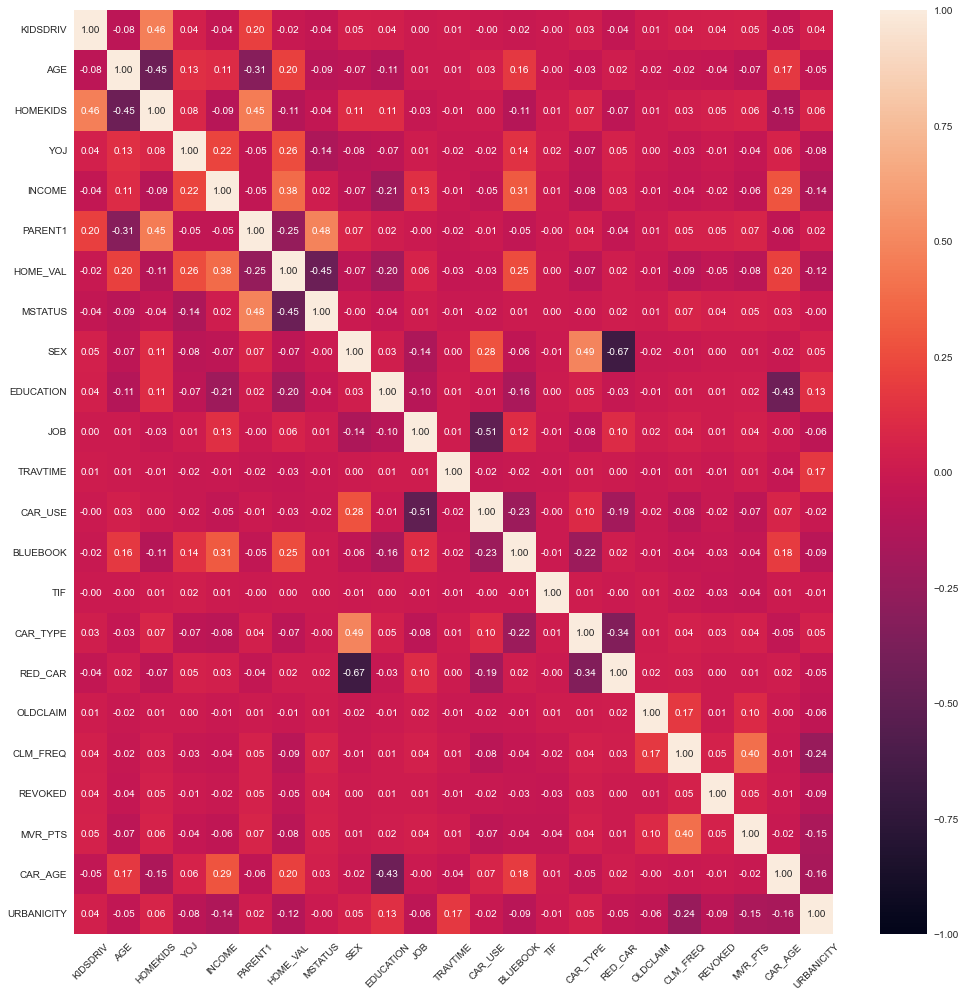

In [17]:
# pair-wise correlation and multicollinearity among the feature vectors
eda_train_data = EDA(clean_and_scaled_data)
eda_train_data.pairwise_correlation_heatmap()

**Based on the examinations made above**

1. There is no multicollinearity problem among the features.
3. Also there is weak level correlation between the columns.

More than 90% of the training data can be explained by just 15 features


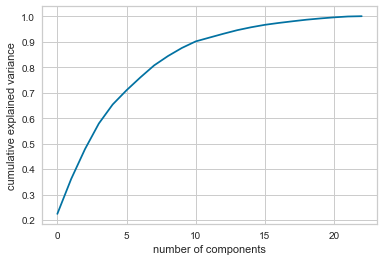

In [18]:
# Principle components analysis for dimentionality reduction
eda_train_data.pca_plot()

**Based on PCA shown above**
1. After expressing the features in principle components, its evident from the figure above redundant principal components can be dropped to reduce the number of features of the data.
2. Dropping these features doesn't affect the performance of machine learning algorithms.
3. Fifteen principal components are enough to explain 95% of the data.

## ML-Models and Results

Five popular binary classification methods are explored for this case study:

1. Logistic Regression
2. Decision Tree Classifier
3. Support Vector Classifier
4. Random Forest Classifier
5. KNearest Neighbour Classifier

Before performing the classification using above methods the entire training original dataset is split in ratio of 70-30 for performance analysis as shown below

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(train_data_original, train_data_original['TARGET_FLAG'], test_size=0.3, random_state = 50)
cprint('After train-test split number of customer records with class 0 and 1', color = 'green')
cprint('1. train data', color = 'grey')
cprint('--------------', color = 'red')
print(Y_train.value_counts())
cprint('\n2. test data', color = 'grey')
cprint('--------------', color = 'red')
print(Y_test.value_counts())

After train-test split number of customer records with class 0 and 1
1. train data
--------------
0    4174
1    1538
Name: TARGET_FLAG, dtype: int64

2. test data
--------------
0    1834
1     615
Name: TARGET_FLAG, dtype: int64


### Logistic Regression


Mertrics and Confusion Matrix of Model


,train_set,test_set
Accuracy,0.777311,0.776235
Precision,0.646799,0.587013
Recall,0.381014,0.367480
f1,0.479542,0.452000


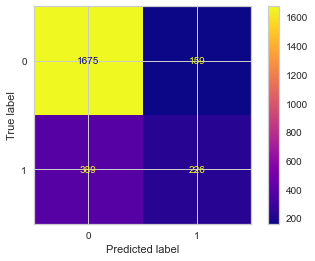

In [27]:
Models = ModelsforAutoInsurance(X_train, Y_train)
lg_reg_pipeline, lg_reg_model = Models.logistic_regression_model()
Models.eval(lg_reg_pipeline, X_test, Y_test, lg_reg_model)

### Decision Tree Classifier


Mertrics and Confusion Matrix of Model


,train_set,test_set
Accuracy,1.0,0.666394
Precision,1.0,0.363881
Recall,1.0,0.439024
f1,1.0,0.397937


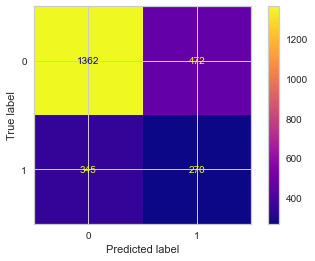

In [21]:
decision_tree_pipeline, decision_tree_model = Models.decision_tree_classifier()
Models.eval(decision_tree_pipeline, X_test, Y_test, decision_tree_model)

### Support Vector Classifier


Mertrics and Confusion Matrix of Model


,train_set,test_set
Accuracy,0.729167,0.683544
Precision,0.498170,0.426063
Recall,0.796489,0.749593
f1,0.612960,0.543312


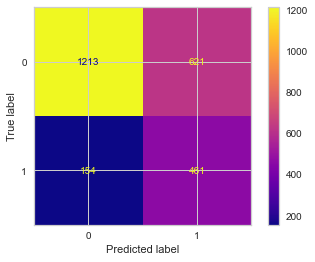

In [22]:
svc_pipeline, svc_model = Models.svc()
Models.eval(svc_pipeline, X_test, Y_test, svc_model)

### Random Forest Classifier


Mertrics and Confusion Matrix of Model


,train_set,test_set
Accuracy,1.0,0.771335
Precision,1.0,0.578797
Recall,1.0,0.328455
f1,1.0,0.419087


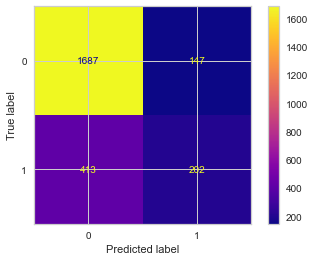

In [23]:
random_forest_pipeline, random_forest_model = Models.random_forest_classifier()
Models.eval(random_forest_pipeline, X_test, Y_test, random_forest_model)

### KNearest Neighbour Classifier


Mertrics and Confusion Matrix of Model


,train_set,test_set
Accuracy,0.823880,0.755819
Precision,0.733333,0.518438
Recall,0.543563,0.388618
f1,0.624347,0.444238


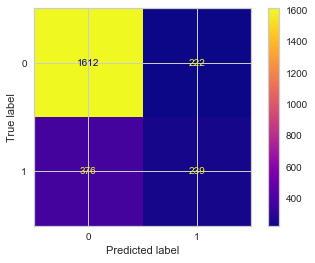

In [24]:
knearest_pipeline, knearest_model = Models.knearest_neighbour_classifier()
Models.eval(knearest_pipeline, X_test, Y_test, knearest_model)

In [42]:
# test_data_original prediction with model of highest F1 score
pred_svc = pd.DataFrame(svc_pipeline.predict(test_data_original), index = test_data_original.INDEX, columns = ['lg_reg_pred'])
pred_svc.to_csv('./Result/best_model_pred.csv')

## Final Remarks

1. Decision trees and Random forests overfit the training data, so the training set metrics seem high for them. However, fails to generalize for testing data

2. Logistic Regression and K-nearest neighbours perform well, but F1 scores are lower than the SVC model. This is valid for both training testing data

3. Hence, we choose SVC as the best model


## Future Improvements

1. Using the grid and cross-validation-based hyperparameter tuning for all the models to improve the performance
2. Careful outlier analysis for further cleaning the data
3. Implementation of neural network-based approach for classificationn